In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_path = '/Users/alinamaksimova/Desktop/shadows of mind/dataset/Edvard Munch/paintings'

In [17]:
def process_images(folder_path):
    results = {}
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            
            # Загружаем изображение в оттенках серого
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue
            
            # Определяем границы с помощью Canny
            edges = cv2.Canny(image, 100, 200)
            
            # Вычисляем суммарную длину границ
            edge_length = np.sum(edges > 0)
            
            # Вычисляем площадь изображения
            height, width = image.shape
            area = height * width
            
            # Нормализуем длину границ по площади
            normalized_length = edge_length / area
            
            results[filename] = normalized_length
    
    return results

def plot_results(results):
    filenames = list(results.keys())
    values = list(results.values())
    bar_width = 1.5
    plt.figure(figsize=(20, 10))
    plt.bar(filenames, values, color='skyblue', width=bar_width)
    plt.xlabel('Image Filename')
    plt.ylabel('Normalized Edge Length')
    plt.title('Edge Length Normalized by Image Area')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


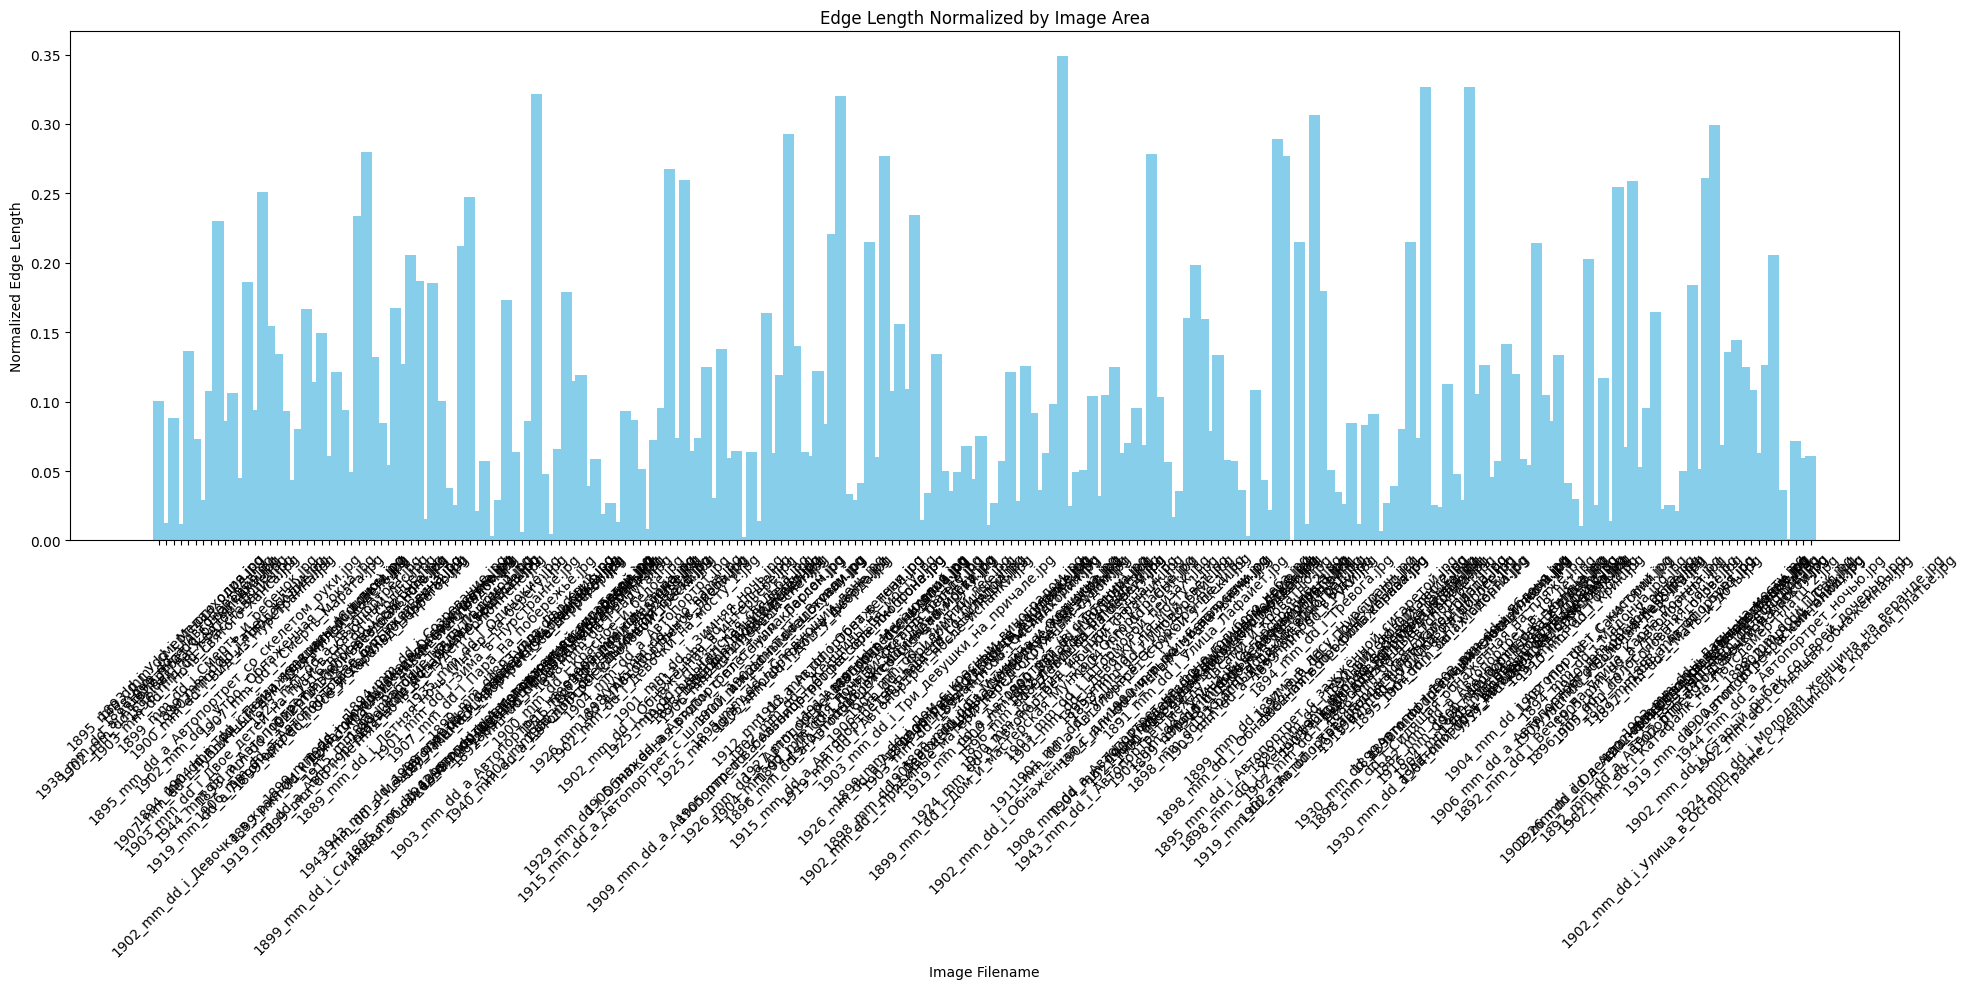

In [18]:
res = process_images(folder_path)

plot_results(res)

In [23]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)

            # Извлекаем год из имени файла
            year = filename.split('_')[0]

            # Пропускаем файлы с неизвестным годом
            if year == "yyyy":
                continue

            # Загружаем изображение в оттенках серого
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Определяем границы с помощью Canny
            edges = cv2.Canny(image, 100, 200)

            # Вычисляем суммарную длину границ
            edge_length = np.sum(edges > 0)

            # Вычисляем площадь изображения
            height, width = image.shape
            area = height * width

            # Нормализуем длину границ по площади
            normalized_length = edge_length / area

            # Агрегируем результаты по годам
            if year in results:
                results[year].append(normalized_length)
            else:
                results[year] = [normalized_length]

    # Усредняем значения для каждого года
    averaged_results = {year: np.mean(values) for year, values in results.items()}

    # Сортируем по году
    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))

    return sorted_results

def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Year')
    plt.ylabel('Average Normalized Edge Length')
    plt.title('Average Edge Length Normalized by Image Area per Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

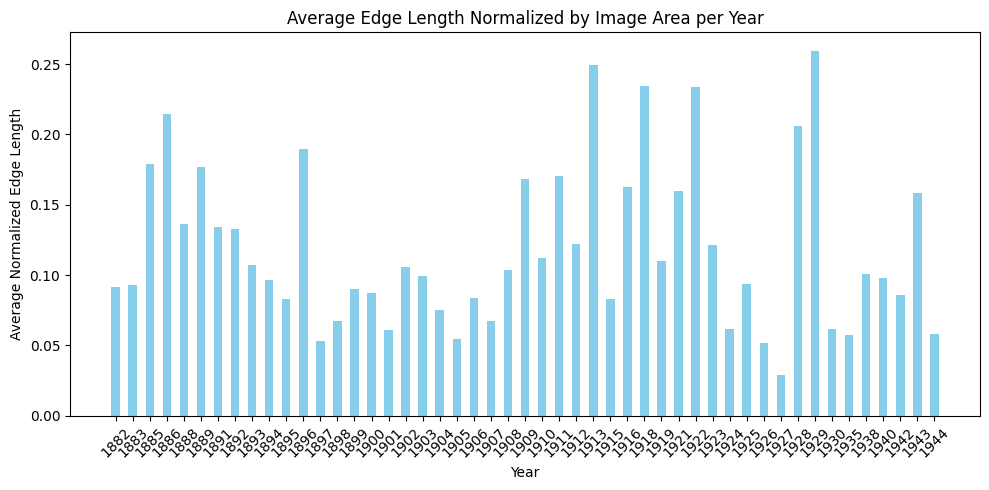

In [22]:
res = process_images(folder_path)

plot_results(res)